In [42]:
from scipy.io import loadmat 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def Verificar_entero(entrada):
    while True:
        dato_int = input(f'ingrese {entrada}')
        try:
            return int(dato_int)
        except:
            print(f'para {entrada} debe ingresar un numero entero.')
            continue
class archivo_mat:
    def __init__(self,ruta_archivo = "r01_edfm (1).mat"):
        self.__data = loadmat(ruta_archivo)['val']
        self.__shape = self.__data.shape
    
    def obten_data(self):
        return self.__data
    
    def obten_limites(self): 
        while True:
            #limite inferior
            Linf = Verificar_entero(f'el valor mínimo del rango en el/los arreglo/s que desea graficar (hay {self.__shape[1]} valores)\n=>')
            if Linf<0 or Linf>=self.__shape[1]:
                print('ingrese un valor que esté dentro del rango del arreglo... reintentando')
                continue
            #Limite superior
            Lsup = Verificar_entero(f'ingrese el valor máximo del rango en el/los arreglo/s que desea graficar (hay {self.__shape[1]} valores)\n=>')
            if Lsup<=0 or Lsup>self.__shape[1]:
                print('ingrese un valor que esté dentro del rango del arreglo... reintentando')
                continue
            if Lsup<=Linf:
                print('el maximo debe ser mayor al mínimo... reintentando')
                continue
            else:
                return (Linf,Lsup)
    def devoler_arreglo_s(self):
        dict_arreglos = {}
        linf,lsup = self.obten_limites()
        while True:
            sub_menu = Verificar_entero('la opción que desea(el número) \n1.graficar un arreglo\n2.graficar varios arreglos\n3.graficar todos los arreglos\n4.volver al menu principal\n=>')
            
            if sub_menu == 1: #un solo arreglo
                while True:
                    opc = Verificar_entero('cual de los 6 arreglos desea graficar(número del 1 al 6):\n=>')
                    if 1<= opc <= 6:
                        dict_arreglos[f'arreglo {opc}'] = self.__data[opc-1 , linf:lsup]
                        return linf, lsup, dict_arreglos
                    else:
                        print('ingrese un numero de arreglo valido(numero del 1 al 6)')
            
            elif sub_menu == 2:#varios arreglos
                while True:
                    num_arreglos = Verificar_entero('cuantos arreglos desea graficar (1 a 6)\n=>')
                    if 1<= num_arreglos <= 6:
                        break
                    else:
                        print('ingrese un valor entre 1 y 6')

                while True:
                    for i in range(10000):
                        if len(list(dict_arreglos.keys())) >= num_arreglos:
                            break
                        opc = Verificar_entero('cual de los 6 arreglos desea graficar(número del 1 al 6):\n=>')
                        if opc < 1 or opc > 6:
                            print('ingrese un valor entre 1 y 6... reintentando')
                            continue
                        try:
                            if dict_arreglos[f'arreglo {opc}'] in self.__data[opc-1 , linf:lsup]:
                                print('este arreglo ya fue seleccionado... intentando de nuevo.')
                                continue
                        except:
                            pass

                        if len(list(dict_arreglos.keys())) < num_arreglos:
                            dict_arreglos[f'arreglo {opc}'] = self.__data[opc-1 , linf:lsup]


                    return linf, lsup, dict_arreglos
            
            elif sub_menu==3: #todos los arreglos
                for i in range(6):
                    dict_arreglos[f'arreglo {i+1}'] = self.__data[i , linf : lsup]

                return linf, lsup, dict_arreglos
            
            elif sub_menu==4:
                return None
            else:

                print('seleccione una opción válida')
                continue
    def graficar_mat(self):
        linf, lsup, dict_arreglos = self.devoler_arreglo_s()
        llaves_arreglos = list(dict_arreglos.keys())
        X = np.arange(lsup-linf)                 

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))                                          
        cont = 0
        for i in llaves_arreglos:
            ax1.plot(X, (dict_arreglos[i] + cont), label=i)    #Graficar Canales
            cont = cont + 20
        ax1.legend()
        ax1.set_ylabel('intensidad')
        ax1.set_xlabel('tiempo')
        ax1.set_title('Miguel N, Ana P.\nseñal fisiologica')
        while True:
            print('de cual arreglo desea obtener el espectro de frecuencias(solo en número):')
            for i in llaves_arreglos:
                print(f'{i},',end='')
            print('\n')
            arreglo_seleccionado_frec = Verificar_entero('opción =>')
            a = True
            for i in llaves_arreglos:
                if i == f'arreglo {arreglo_seleccionado_frec}':
                    a = False
                    break
            if a == False:
                break
            else:
                print('seleccione un arreglo que esté en los seleccionados previamente')
                continue

        print(f'Rango seleccionado(min-max): {linf}-{lsup}')    
        for i in llaves_arreglos:
            print(f'{i}:\n mediana : {np.median(dict_arreglos[i])}\n punto mínimo: {np.min(dict_arreglos[i])}\n punto maximo: {np.max(dict_arreglos[i])}')

        arreglo_seleccionado = dict_arreglos[f'arreglo {arreglo_seleccionado_frec}']
        fft_result = np.fft.fft(arreglo_seleccionado)
        n = len(arreglo_seleccionado)
        frecuencias = np.fft.fftfreq(n)

        indice_min = int(np.floor(n * (linf / (1.0 / (2.0 * n)))))  # Encuentra los índices que corresponden al rango de frecuencias deseado
        indice_max = int(np.floor(n * (lsup / (1.0 / (2.0 * n)))))

        espectro = np.abs(fft_result[indice_min:indice_max])
        ax2.plot(frecuencias[indice_min:indice_max], espectro)
        ax2.set_title(f'Espectro de frecuencias de Arreglo {arreglo_seleccionado_frec}')
        ax2.set_xlabel('Frecuencia')
        ax2.set_ylabel('Amplitud')
        ax2.set_yscale('log')
        plt.tight_layout()
        plt.show()


de cual arreglo desea obtener el espectro de frecuencias(solo en número):
arreglo 1,arreglo 2,arreglo 3,

Rango seleccionado(min-max): 0-100
arreglo 1:
 mediana : 358.0
 punto mínimo: 235
 punto maximo: 506
arreglo 2:
 mediana : 2.0
 punto mínimo: -606
 punto maximo: 63
arreglo 3:
 mediana : -64.0
 punto mínimo: -181
 punto maximo: 133


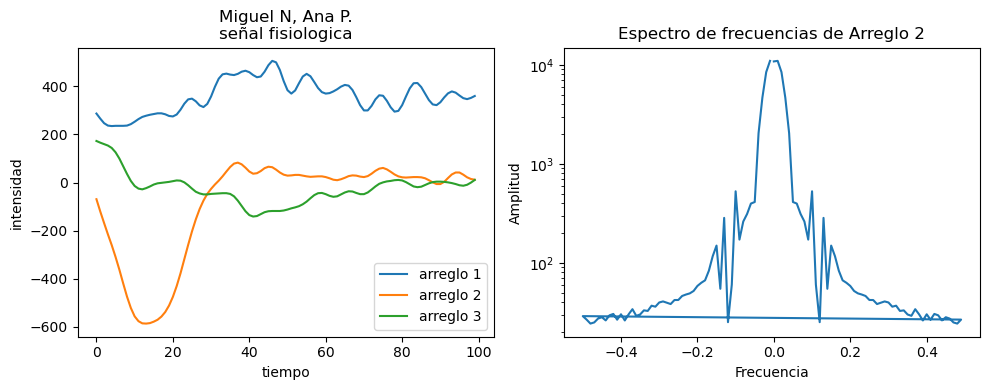

cerrando sistema...


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def csv():
    csv = 'csv_data.csv'
    df = pd.read_csv(csv)

    promedios = df.mean()
    print("Promedios:")
    print(promedios)

    #Gráfica de promedios
    plt.scatter(promedios, range(1, 6), marker='o', color='b', label='Promedios')
    plt.xlabel('Promedios')
    plt.ylabel('Columnas')
    plt.title('Gráfico de Promedios por Columna')
    plt.legend()
    plt.show()

    longitudes = df.count()
    print("Longitudes:")
    print(longitudes)

    longitud_maxima = max(df.count())

    eje_x = range(1, longitud_maxima + 1)

    # gráfico de puntos
    for columna in df.columns:
        
        longitud_columna = df[columna].count()
        eje_y = [df[columna].iloc[i] for i in range(longitud_columna)]
        
        plt.scatter(eje_x[:longitud_columna], eje_y, marker='o', label=columna)

    plt.xlabel('Longitud de la Columna')
    plt.ylabel('Datos de la Columna')
    plt.title('Gráfico de Puntos con Longitud de Columnas en el Eje X')
    plt.legend()
    plt.show()

    #Gráfica de puntos solo con datos pares
    def replace_odd_with_zero(x):
        return x if x % 2 == 0 else 0

    datos_pares = df.applymap(replace_odd_with_zero)

    for columna in df.columns:
        plt.scatter(range(1, len(df) + 1), datos_pares[columna], label=columna)
    plt.xlabel('Índice de Fila')
    plt.ylabel('Valores (Pares o 0)')
    plt.title('Gráfico de Puntos para Datos Pares')
    plt.legend()
    plt.show()

    # Gráfica de puntos utilizando la función seno de los datos
    for columna in df.columns:
        y = np.sin(df[columna])
        plt.scatter(df[columna], y, label=f'seno de {columna}', alpha=0.5)
    plt.xlabel('Datos de las Columnas')
    plt.ylabel('Seno de los Datos')
    plt.title('Gráfico de Datos y su Seno')
    plt.legend()
    plt.show()

def main():
    while True:
        menu = Verificar_entero('la opcion deseada=>\n1. graficar con el archivo MATLAB\n2.datos de el archivo CSV\n3.salir\n=>')
        if menu ==1:
            a = archivo_mat()
            a.graficar_mat()
        elif menu==2:
            csv()
        elif menu==3:
            print('cerrando sistema...')
            break
        else:
            print('seleccione una opción valida... reintentando')
            continue

main()
